## Tutorial 2. Exploratory data analysis with Seaborn and Using Pandas like SQL

Created by Emanuel Flores-Bautista 2018.  All code contained in this notebook is licensed under the [Creative Commons License 4.0](https://creativecommons.org/licenses/by/4.0/).

This tutorial was based on the following pandas documentation [tutorial](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html).

After thinking that I might be involved in querying with IDs in Computational Biology and a lot of work is related with databases, I wanted to explore a bit of SQL. This is an amazing learn-by-doing tutorial on how to use Pandas as SQL.

In case you don't know what [SQL](https://es.wikipedia.org/wiki/SQL) is...

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [5]:
tips = sns.load_dataset("tips")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
type(tips)

pandas.core.frame.DataFrame

We introduce now the glorious Pandas' `DataFrame`, that is the way to work with structured data (`.xls, .csv, .tsv` ...) in Python. 

The `.head()` method returns the first five rows of our `DataFrame`

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Likewise, `.tail` method returns the last five rows...

In [16]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


We can see the size of our data set, calling the `shape` attribute.

In [17]:
tips.shape

(244, 7)

First thing we can do when we are working with `DataFrame`s is to call the `.describe()` method. 

In [18]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Now we have a sense of our data. There are three numerical columns and we know their descriptive statistics, and their quartiles.

### Selecting columns 

It's better to select columns and create a new dataframe, than dropping the unwanted columns one by one. 

In [11]:
tips[['total_bill', 'tip', 'smoker']].head()

,total_bill,tip,smoker
0,16.99,1.01,No
1,10.34,1.66,No
2,21.01,3.50,No
3,23.68,3.31,No
4,24.59,3.61,No


### Filtering 

The most intuitive way of filtering is through boolean indexing. Let's select the data corresponding to Dinner in our data set.

In [14]:
(tips['time'] == 'Dinner').tail()

239    True
240    True
241    True
242    True
243    True
Name: time, dtype: bool

In this way, we can see that the returned object is a column of boolean objects. We can now call this boolean column to select what we want from our data.

In [19]:
tips[tips['time'] == 'Dinner'].tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The above statement is passing a Series of `True/ False` objects to the DataFrame, returning all rows with `True`. 

This is another way to do it. 

In [20]:
is_dinner = tips['time'] == 'Dinner'
    
##This yields exactly the same 
tips[is_dinner].tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Let's now count the number of dinner entries in our data set. we can use the `.value_counts()` method to do so. 

In [22]:
is_dinner.value_counts()

True     176
False     68
Name: time, dtype: int64

There are a lot of methods like this one, already implemented in Pandas. 

Multiple conditions can be passed to a DataFrame to filter (OR, AND, XOR..)

In [27]:
tips[(is_dinner) & (tips['size'] < 5)].head() ## less than five tippers at dinner time 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
tips[(is_dinner) | (tips['size'] < 5.)].tail() # OR

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Exploratory Data Analysis (EDA)

We'll now use the amazing [Seaborn](http://seaborn.pydata.org/) module to do some EDA. I strongly encourage you to look at their [gallery](http://seaborn.pydata.org/examples/index.html) to see some awesome examples. This module is great to make some interesting and publishable graphs for your future papers.

We'll explore our data set using different color [palettes](https://seaborn.pydata.org/tutorial/color_palettes.html).

Let's ask: in average, who tips more men or women?

/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


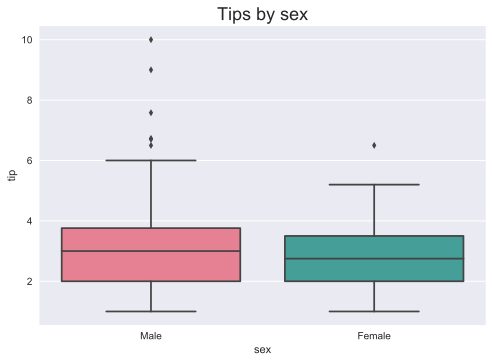

In [30]:
ax = sns.boxplot(x= tips['sex'], y = tips['tip'], palette = "husl")
ax.set_title('Tips by sex', fontsize= 18)

We can see that on average, men are higher tippers... sorry women, not being macho, this could be a biased data set... :p 

This is the boxplot, or whiskerplot, created by John Tukey himself! 

Boxplot description...

We can visualize the distribution differently using the violin plot.

/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


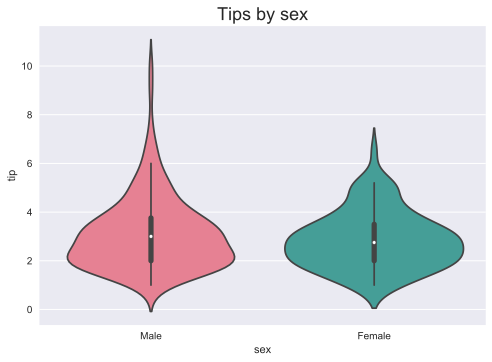

In [31]:
ax = sns.violinplot(x= tips['sex'], y = tips['tip'], palette = "husl")
ax.set_title('Tips by sex', fontsize= 18)

Violinplots are nice, but to get a real sense of our data, is best to use a 

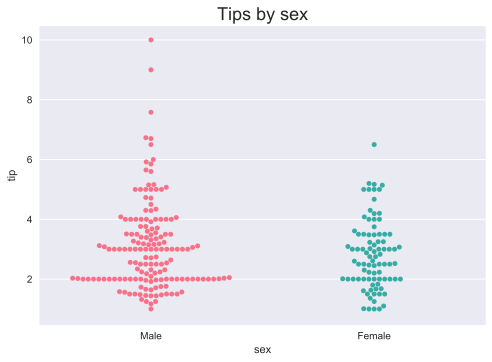

In [32]:
ax = sns.swarmplot(x= tips['sex'], y = tips['tip'], palette = "husl")
ax.set_title('Tips by sex', fontsize= 18)

but the best of the best is to use a swarm plot + a boxplot.

/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


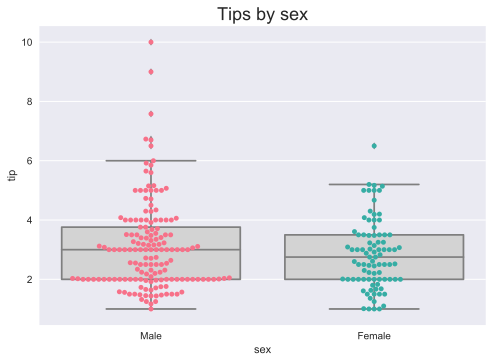

In [33]:
ax = sns.boxplot(x= tips['sex'], y = tips['tip'],color='lightgrey')
ax = sns.swarmplot(x= tips['sex'], y = tips['tip'], palette = "husl")

ax.set_title('Tips by sex', fontsize= 18)

Can you implement a violinplot + a swarmplot ? Use a different palette for fun.

In [ ]:
## write your code here 

ax = 
ax = 

ax.set_title()

Now that we have a fairly good visualizing toolbox, let's keep interrogating our data. Which day is the best, tips-wise?

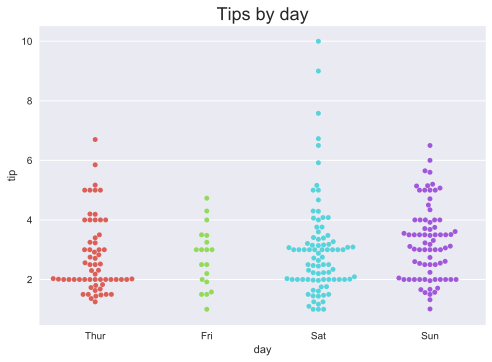

In [34]:
ax = sns.swarmplot(x= tips['day'], y = tips['tip'], palette = "hls")
ax.set_title('Tips by day', fontsize= 18)

Did you see it coming? 

Who tips more, smokers or non-smokers? 

In [ ]:
##Write your code here

We can visualize multiple variables of our data using the `hue`argument. Let's repeat the question, what day is the best, tips-wise? Does the smoker, non-smoker principles holds ?

/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:932: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


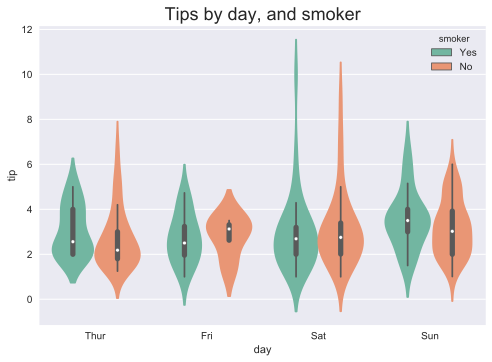

In [39]:
ax = sns.violinplot(x= tips['day'], y = tips['tip'], hue = tips['smoker'],palette = "Set2")
ax.set_title('Tips by day, and smoker', fontsize= 18)

Let's look at it from a different perspective..

/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:932: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


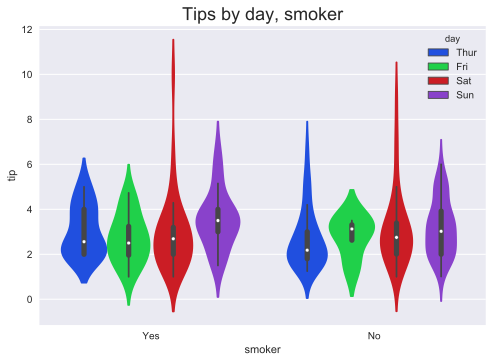

In [41]:
ax = sns.violinplot(x= tips['smoker'], y = tips['tip'], hue = tips['day'],palette = 'bright')
ax.set_title('Tips by day, smoker', fontsize= 18)

We see that the high-tip smokers don't come by the restaurant each day. 

Let's ask, does the smoker principle holds when comparing men and women?

/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:932: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


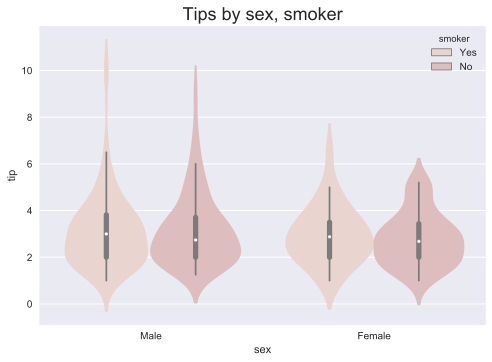

In [40]:
ax = sns.violinplot(x= tips['sex'], y = tips['tip'], hue = tips['smoker'],palette = sns.cubehelix_palette(10))
ax.set_title('Tips by sex, smoker', fontsize= 18)

/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


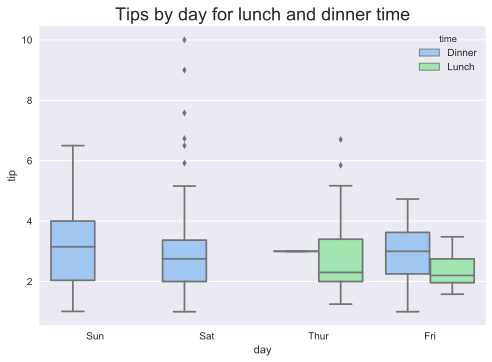

In [50]:
ax = sns.boxplot(x= tips['day'], y = tips['tip'], hue = tips['time'],palette = 'pastel')
ax.set_title('Tips by day and time', fontsize= 18)

/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:932: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


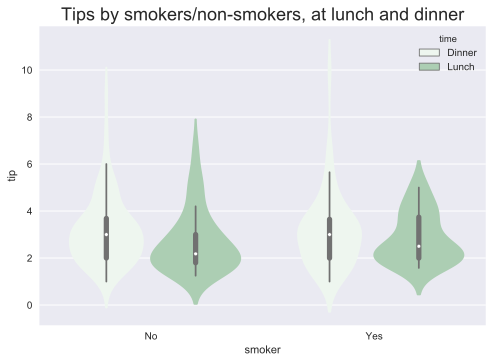

In [73]:
ax = sns.violinplot(x= tips['smoker'], y = tips['tip'], hue = tips['time'],palette = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=False))
ax.set_title('Tips by smoker, time', fontsize= 18)

## Pandas as SQL

### Group By

The groupby method is a very powerful method on `DataFrames` that allows grouping data with non-categorical variables. Let's see how it works.

Get the count of records in each group throughout a dataset. Example: Get the number of tips left by sex. 

In [25]:
tips.groupby('sex').size() # size gets the total counts of a groupby object

sex
Female     87
Male      157
dtype: int64

We can see that our data set is biased, there are more men than women.

In [26]:
tips.groupby('sex').count() #  gets count by column 

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,87,87,87,87,87,87
Male,157,157,157,157,157,157


We can apply the `count()` method to an individual column.

In [27]:
tips.groupby('sex')['total_bill'].count() 

sex
Female     87
Male      157
Name: total_bill, dtype: int64

Great! We get the same result with the `size()` method

Say we'd like to see how tip differes by day of the week. `agg()` method allows you to pass a dictionary to your grouped `DataFrame`(or more precisely to your `groupby` object) indicating, which functions to apply to specific columns. 

In [39]:
tips.groupby('day').size() ###how many days are there represented in the dataset?

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

We can see that there are only four days of the week in the dataset. Let's get the mean of the tips by day and the counts of each day in our data set.

In [42]:
tips.groupby('day').agg({'tip': np.mean, 'day': np.size})

,tip,day
day,,
Fri,2.734737,19
Sat,2.993103,87
Sun,3.255132,76
Thur,2.771452,62


We can see that on average, Saturday and Sunday have  higher tips than on Friday and Thursday.

Now let's explore, on average, if men or women are better tippers.

In [46]:
tips.groupby('sex').agg({'tip': np.mean})

,tip
sex,
Female,2.833448
Male,3.089618


We can confirm our observations on the EDA. 

Now let's explore, on average, if smokers or non-smokers are better tippers.

In [48]:
tips.groupby('smoker').agg({'tip': np.mean})

,tip
smoker,
No,2.991854
Yes,3.008710


We can see that by a little margin, on average smokers are better tippers, confirming the smoker principle.

We can expect that at the dinner, there are better tips, but let's ask our data. 

In [49]:
tips.groupby('time').agg({'tip': np.mean})

,tip
time,
Dinner,3.102670
Lunch,2.728088


We see that we were right...

> We can also group by more than one column..this would be analogous to the hue argument...

In [50]:
tips.groupby(['smoker', 'day']).agg({'tip': [np.size, np.mean]})

tip          
             size      mean
smoker day                 
No     Fri    4.0  2.812500
       Sat   45.0  3.102889
       Sun   57.0  3.167895
       Thur  45.0  2.673778
Yes    Fri   15.0  2.714000
       Sat   42.0  2.875476
       Sun   19.0  3.516842
       Thur  17.0  3.030000

We can now see that there is more information in our data by grouping for more than one column.

In [51]:
tips.groupby(['smoker', 'sex']).agg({'tip': [np.size, np.mean]})

tip          
               size      mean
smoker sex                   
No     Female  54.0  2.773519
       Male    97.0  3.113402
Yes    Female  33.0  2.931515
       Male    60.0  3.051167

Now, we see that female smokers tip better than female non-smokers, and that non-smoker men tip better. $However$, based on this data, men tip better than women, despite them being smokers or non...

### Join: horizontal

In Pandas, join can be performed with `join()` or `merge()`. Each method has parameters allowing to specify the type of join (left, right, inner, full). 

In [76]:
df1= pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                     'value': np.random.randn(4)})
df2 = pd.DataFrame({'key': ['B', 'D', 'D', 'E'],
                     'value': np.random.randn(4)})

#####  Inner join

In [56]:
df1.head()

,key,value
0,A,-2.145211
1,B,0.056091
2,C,-0.099776
3,D,0.163631


In [55]:
df2.head()

,key,value
0,B,0.844301
1,D,1.647800
2,D,-0.195858
3,E,-3.342571


Merge performs an inner join.

In [61]:
indexed_df2 = df2.set_index('key')

pd.merge(df1, indexed_df2, left_on= 'key', right_index= True)

,key,value_x,value_y
1,B,0.056091,0.844301
3,D,0.163631,1.647800
3,D,0.163631,-0.195858


In [59]:
indexed_df2

,value
key,
B,0.844301
D,1.647800
D,-0.195858
E,-3.342571


#####  Left outer join 

In [64]:
pd.merge(df1, df2, on= 'key', how= 'left') # Show all records from df1

,key,value_x,value_y
0,A,-2.145211,NaN
1,B,0.056091,0.844301
2,C,-0.099776,NaN
3,D,0.163631,1.647800
4,D,0.163631,-0.195858


#####  Right join 

In [65]:
##Show all records from df 2

pd.merge(df1, df2, on='key', how='right')

,key,value_x,value_y
0,B,0.056091,0.844301
1,D,0.163631,1.647800
2,D,0.163631,-0.195858
3,E,NaN,-3.342571


#####  Full outer join 

In [77]:
# Show all records from both frames.
pd.merge(df1, df2, on='key', how= 'outer')

,key,value_x,value_y
0,A,0.982865,NaN
1,B,0.740118,-0.055061
2,C,-0.602514,NaN
3,D,0.672091,0.489471
4,D,0.672091,0.459655
5,E,NaN,1.310269


### Union: vertical

In [79]:
df1 = pd.DataFrame({'city': ['Chicago', 'San Francisco', 'New York City'],'rank': range(1, 4)})

df2 = pd.DataFrame({'city': ['Chicago', 'Boston', 'Los Angeles'],'rank': [1, 4, 5]})

In [80]:
pd.concat([df1, df2])

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
0,Chicago,1
1,Boston,4
2,Los Angeles,5


In [81]:
pd.concat([df1, df2]).drop_duplicates()

,city,rank
0,Chicago,1
1,San Francisco,2
2,New York City,3
1,Boston,4
2,Los Angeles,5


### Update

In [97]:
tips.loc[tips['tip'] < 2, 'tip'] *= 2

In [98]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.02,Female,No,Sun,Dinner,2
1,10.34,3.32,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Delete

In pandas we select rows we want to keep :)

In [99]:
tips = tips.loc[tips['tip'] <= 9]

In [100]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.02,Female,No,Sun,Dinner,2
1,10.34,3.32,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [101]:
tips.shape

(243, 7)

#### Final thoughts

We can now interrogate datasets using Pandas, and visualize them using Seaborn. Are you convinced now that Python is fun and easy? 